In [1]:
# Library utama untuk manipulasi data
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Supaya grafik tampil rapi di notebook
sns.set(style="whitegrid")


In [2]:
# Membaca file anime.csv dan menyimpannya sebagai DataFrame
anime_df = pd.read_csv("anime.csv")

# Menampilkan ukuran dataset (jumlah baris & kolom)
print("Ukuran Dataset:", anime_df.shape)

# Menampilkan 5 data teratas untuk pengecekan awal
anime_df.head()


Ukuran Dataset: (12294, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
# Menampilkan tipe data setiap kolom (int, float, object)
anime_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
# Menghitung jumlah data yang kosong di setiap kolom
anime_df.isnull().sum()



anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
# ==============================
# CLEANING DATA KOSONG (MISSING VALUE)
# ==============================

# 1️⃣ Mengisi rating kosong dengan nilai rata-rata (mean)
# Menghindari distorsi distribusi rating
anime_df["rating"] = anime_df["rating"].fillna(anime_df["rating"].mean())

# 2️⃣ Mengisi episodes kosong dengan 0
# Diasumsikan jika kosong → 0 episode
anime_df["episodes"] = anime_df["episodes"].fillna(0)

# 3️⃣ Mengisi genre kosong dengan 'Unknown'
# Agar kategori tetap konsisten, tidak ada nilai kosong
anime_df["genre"] = anime_df["genre"].fillna("Unknown")

# 4️⃣ Mengisi type kosong dengan 'Unknown'
# Agar kolom tipe anime tidak ada missing value
anime_df["type"] = anime_df["type"].fillna("Unknown")

# ==============================
# CEK HASIL CLEANING
# ==============================
anime_df.isnull().sum()


anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [6]:
# Menampilkan jumlah nilai unik pada setiap kolom
anime_df.nunique()


anime_id    12294
name        12292
genre        3265
type            7
episodes      187
rating        599
members      6706
dtype: int64

In [7]:
# Menampilkan ringkasan statistik kolom numerik
anime_df[["rating", "members", "episodes"]].describe()


,rating,members
count,12294.000000,1.229400e+04
mean,6.473902,1.807134e+04
std,1.017096,5.482068e+04
min,1.670000,5.000000e+00
25%,5.900000,2.250000e+02
50%,6.550000,1.550000e+03
75%,7.170000,9.437000e+03
max,10.000000,1.013917e+06


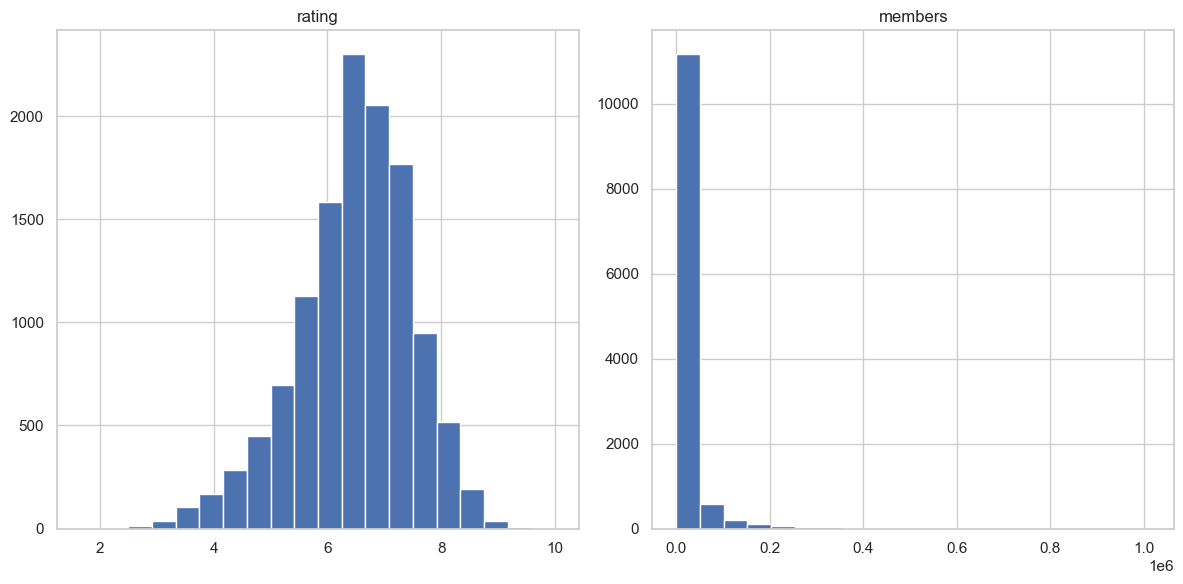

In [8]:
# Membuat histogram distribusi rating, members & episodes
anime_df[["rating", "members", "episodes"]].hist(
    bins=20,
    figsize=(12, 6)
)

# Mengatur agar grafik tidak saling bertabrakan
plt.tight_layout()

# Menampilkan grafik
plt.show()


In [12]:
# Mengurutkan berdasarkan skor tertinggi
top_score = anime_df.sort_values(by="score", ascending=False).head(10)

# Menampilkan hasil peringkat
top_score[["name", "rating", "members", "score"]]


,name,rating,members,score
10464,Taka no Tsume 8: Yoshida-kun no X-Files,10.00,13,7.000004
10400,Spoon-hime no Swing Kitchen,9.60,47,6.720014
1,Fullmetal Alchemist: Brotherhood,9.26,793665,6.716831
9595,Mogura no Motoro,9.50,62,6.650018
0,Kimi no Na wa.,9.37,200630,6.618363
3,Steins;Gate,9.17,673572,6.618298
9078,Kahei no Umi,9.33,44,6.531013
6,Hunter x Hunter (2011),9.13,425855,6.517003
2,Gintama°,9.25,114262,6.508808
10,Clannad: After Story,9.06,456749,6.477144


In [15]:
# Menghitung rata-rata popularitas tiap genre
genre_popularity = (
    genre_df
    .groupby("genre")["members"]
    .mean()
    .sort_values(ascending=False)
)

# Menampilkan 10 genre dengan popularitas tertinggi
genre_popularity.head(10)


genre
 Thriller         117765.406977
 Psychological     80513.014563
Josei              77134.000000
 Harem             69255.901818
 Vampire           63373.623762
Mystery            62764.824324
 Supernatural      55719.400782
 Mystery           52810.691211
 Super Power       49146.101293
 School            46546.173504
Name: members, dtype: float64

In [16]:
# Menghitung rata-rata rating tiap genre
genre_rating = (
    genre_df
    .groupby("genre")["rating"]
    .mean()
    .sort_values(ascending=False)
)

# Menampilkan 10 genre dengan rating tertinggi
genre_rating.head(10)


genre
 Josei            7.409565
 Thriller         7.381906
Josei             7.366667
 Mystery          7.248782
 Drama            7.138084
 Psychological    7.121203
 Police           7.117438
 Shounen          7.058406
Mystery           7.036780
 Romance          7.017903
Name: rating, dtype: float64

In [17]:
# Memastikan kolom numerik memang numerik
anime_df["rating"] = pd.to_numeric(anime_df["rating"], errors="coerce")
anime_df["members"] = pd.to_numeric(anime_df["members"], errors="coerce")
anime_df["episodes"] = pd.to_numeric(anime_df["episodes"], errors="coerce")

# Jika ada nilai tidak valid, akan menjadi NaN → bisa diisi ulang
anime_df["rating"] = anime_df["rating"].fillna(anime_df["rating"].mean())
anime_df["members"] = anime_df["members"].fillna(anime_df["members"].median())
anime_df["episodes"] = anime_df["episodes"].fillna(0)


In [18]:
# Menghitung korelasi antar kolom numerik
correlation_matrix = anime_df[["rating", "members", "episodes"]].corr()

# Menampilkan hasil korelasi
correlation_matrix


,rating,members,episodes
rating,1.000000,0.387523,0.089204
members,0.387523,1.000000,0.057174
episodes,0.089204,0.057174,1.000000


In [19]:
# Menghitung korelasi antar variabel numerik
correlation_matrix = anime_df[["rating", "members", "episodes"]].corr()

# Menampilkan hasil korelasi
correlation_matrix


,rating,members,episodes
rating,1.000000,0.387523,0.089204
members,0.387523,1.000000,0.057174
episodes,0.089204,0.057174,1.000000


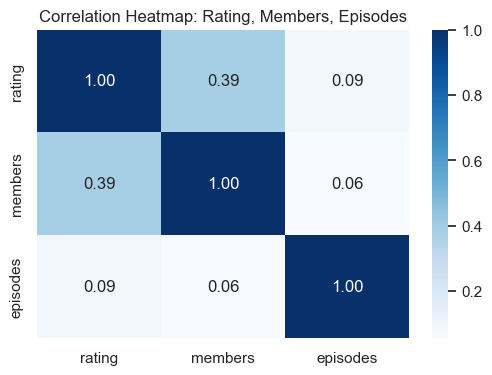

In [20]:
# Mengatur ukuran visual
plt.figure(figsize=(6, 4))

# Membuat heatmap korelasi
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="Blues",
    fmt=".2f"
)

# Memberi judul grafik
plt.title("Correlation Heatmap: Rating, Members, Episodes")

# Menampilkan heatmap
plt.show()


In [22]:
# Mengurutkan berdasarkan skor tertinggi
top_score = anime_df.sort_values(by="score", ascending=False).head(10)

# Menampilkan hasil peringkat
top_score[["name", "rating", "members", "score"]]


,name,rating,members,score
10464,Taka no Tsume 8: Yoshida-kun no X-Files,10.00,13,7.000004
10400,Spoon-hime no Swing Kitchen,9.60,47,6.720014
1,Fullmetal Alchemist: Brotherhood,9.26,793665,6.716831
9595,Mogura no Motoro,9.50,62,6.650018
0,Kimi no Na wa.,9.37,200630,6.618363
3,Steins;Gate,9.17,673572,6.618298
9078,Kahei no Umi,9.33,44,6.531013
6,Hunter x Hunter (2011),9.13,425855,6.517003
2,Gintama°,9.25,114262,6.508808
10,Clannad: After Story,9.06,456749,6.477144


In [23]:
# Menduplikasi dataset untuk analisis genre
genre_df = anime_df.copy()

# Memisahkan genre yang awalnya satu string menjadi list
genre_df["genre"] = genre_df["genre"].str.split(",")

# Mengubah setiap list genre menjadi 1 baris per genre
genre_df = genre_df.explode("genre")
